In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as ans

merge_partial()

In [2]:
df = pd.read_csv('final.csv')
df

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,value
0,0,39.25,0.43,22.75,0.43,33.75,1.30,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.00,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.00,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.00,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.00,bending1
...,...,...,...,...,...,...,...,...
41274,118750,31.50,1.66,12.50,3.20,14.25,4.44,walking
41275,119000,27.33,1.25,11.33,0.94,20.00,4.00,walking
41276,119250,37.80,7.68,14.20,2.48,17.25,0.83,walking
41277,119500,33.75,1.30,15.75,5.21,16.50,2.69,walking


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41279 entries, 0 to 41278
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   # Columns: time  41279 non-null  object 
 1   avg_rss12        40799 non-null  float64
 2   var_rss12        40799 non-null  float64
 3   avg_rss13        40799 non-null  float64
 4   var_rss13        40799 non-null  float64
 5   avg_rss23        40799 non-null  float64
 6   var_rss23        40799 non-null  float64
 7   value            41279 non-null  object 
dtypes: float64(6), object(2)
memory usage: 2.5+ MB


In [4]:
df.value.unique()

array(['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing',
       'walking'], dtype=object)

In [5]:
df.isnull().sum()

# Columns: time      0
avg_rss12          480
var_rss12          480
avg_rss13          480
var_rss13          480
avg_rss23          480
var_rss23          480
value                0
dtype: int64

In [6]:

# Dropping the null values because we have a large data, and dropping few rows won't affect much
df1 = df.dropna()
df1.shape

(40799, 8)

In [7]:
df1.isnull().sum()

# Columns: time    0
avg_rss12          0
var_rss12          0
avg_rss13          0
var_rss13          0
avg_rss23          0
var_rss23          0
value              0
dtype: int64

In [8]:
df1

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,value
0,0,39.25,0.43,22.75,0.43,33.75,1.30,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.00,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.00,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.00,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.00,bending1
...,...,...,...,...,...,...,...,...
41274,118750,31.50,1.66,12.50,3.20,14.25,4.44,walking
41275,119000,27.33,1.25,11.33,0.94,20.00,4.00,walking
41276,119250,37.80,7.68,14.20,2.48,17.25,0.83,walking
41277,119500,33.75,1.30,15.75,5.21,16.50,2.69,walking


In [9]:
df1['value'] = df1['value'].map({'bending1': 1, 'bending2': 0,'lying':2,'walking':3 , 'standing': 4,'sitting':5,'cycling':6})


<ipython-input-9-e54481263661>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['value'] = df1['value'].map({'bending1': 1, 'bending2': 0,'lying':2,'walking':3 , 'standing': 4,'sitting':5,'cycling':6})


In [10]:
df1

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,value
0,0,39.25,0.43,22.75,0.43,33.75,1.30,1
1,250,39.25,0.43,23.00,0.00,33.00,0.00,1
2,500,39.25,0.43,23.25,0.43,33.00,0.00,1
3,750,39.50,0.50,23.00,0.71,33.00,0.00,1
4,1000,39.50,0.50,24.00,0.00,33.00,0.00,1
...,...,...,...,...,...,...,...,...
41274,118750,31.50,1.66,12.50,3.20,14.25,4.44,3
41275,119000,27.33,1.25,11.33,0.94,20.00,4.00,3
41276,119250,37.80,7.68,14.20,2.48,17.25,0.83,3
41277,119500,33.75,1.30,15.75,5.21,16.50,2.69,3


In [11]:
df2  = df1.drop(["# Columns: time"],axis=1)

C:\Users\Sanjeev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sanjeev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sanjeev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

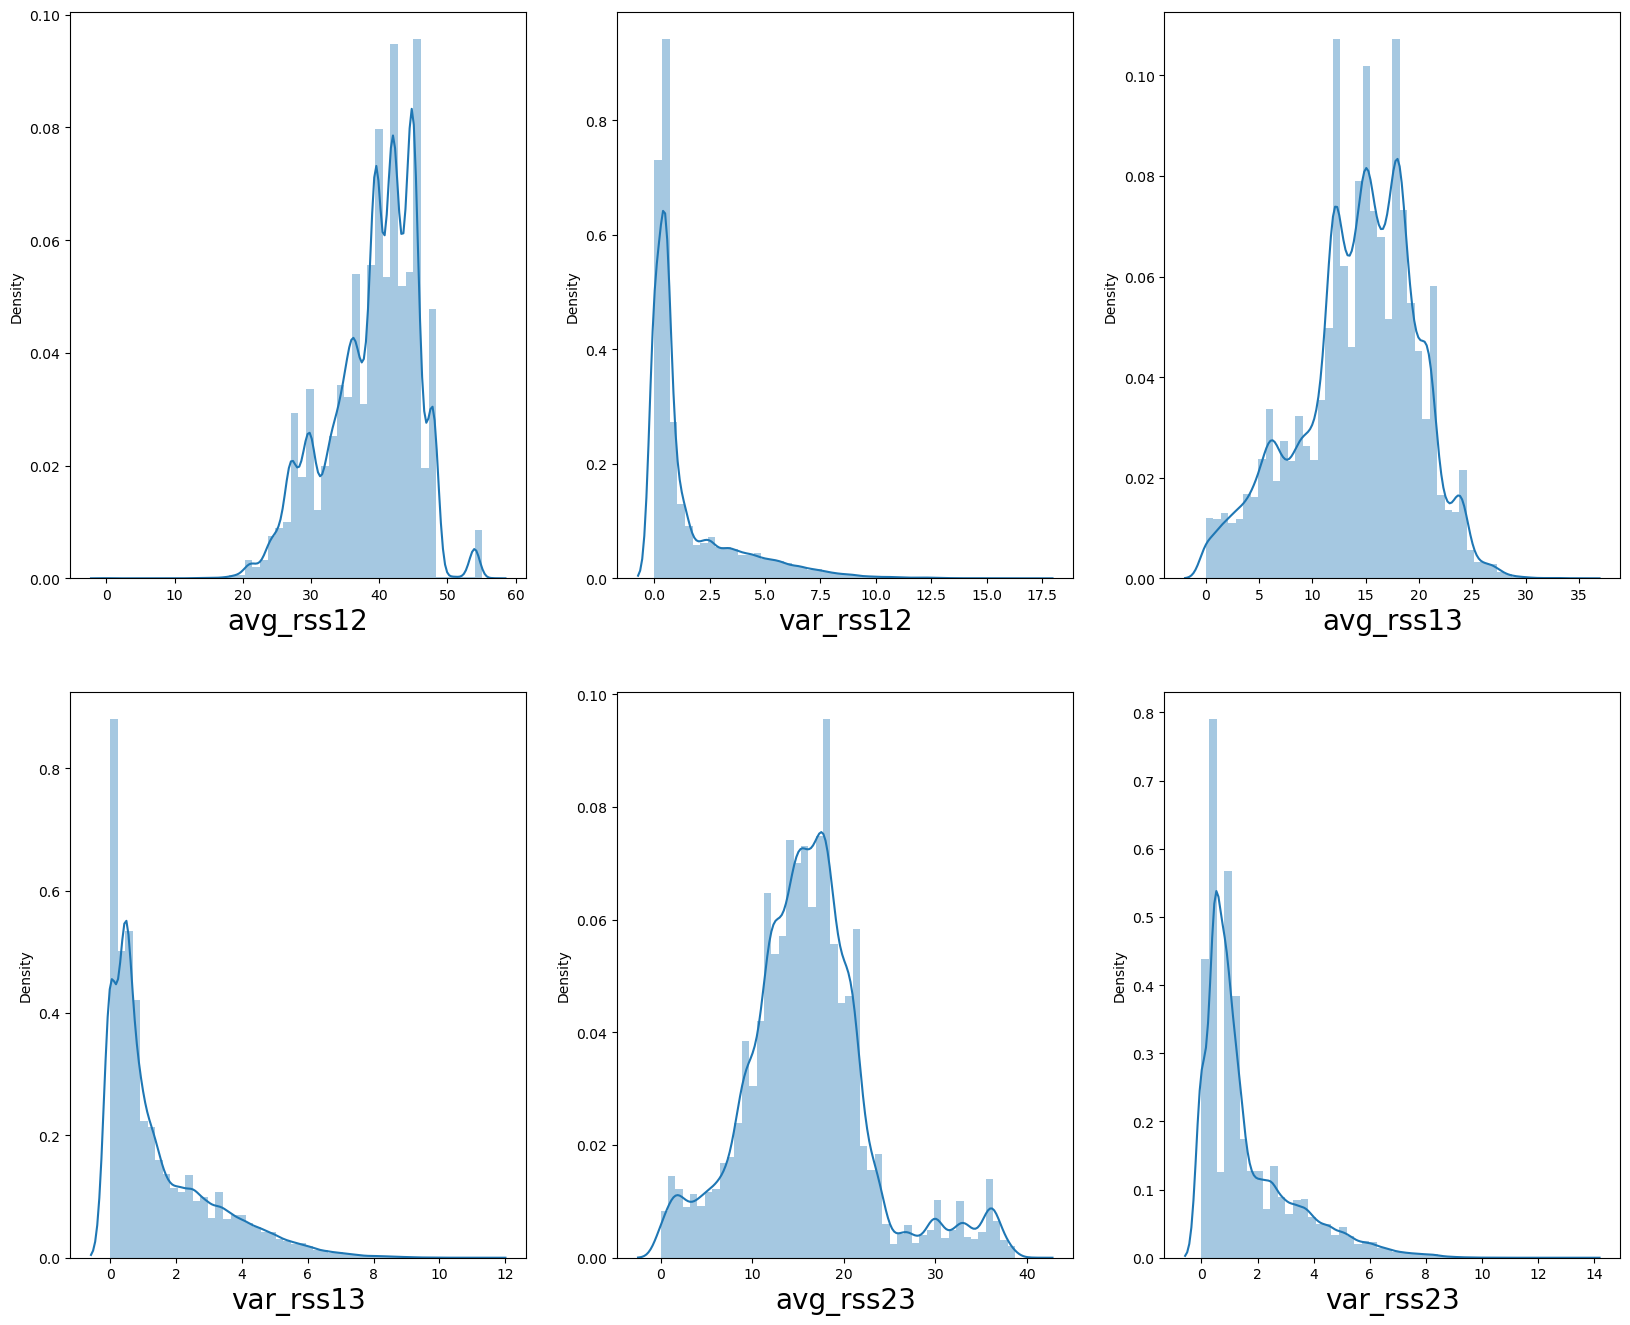

In [12]:
# Let's see how data is distributed for every column
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,25),facecolor= 'white')
plotnumber = 1
for column in df2:
    if plotnumber <=6:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df2[column])
        plt.xlabel(column,fontsize= 20)
    plotnumber+=1
plt.show()

### Checking for outliers

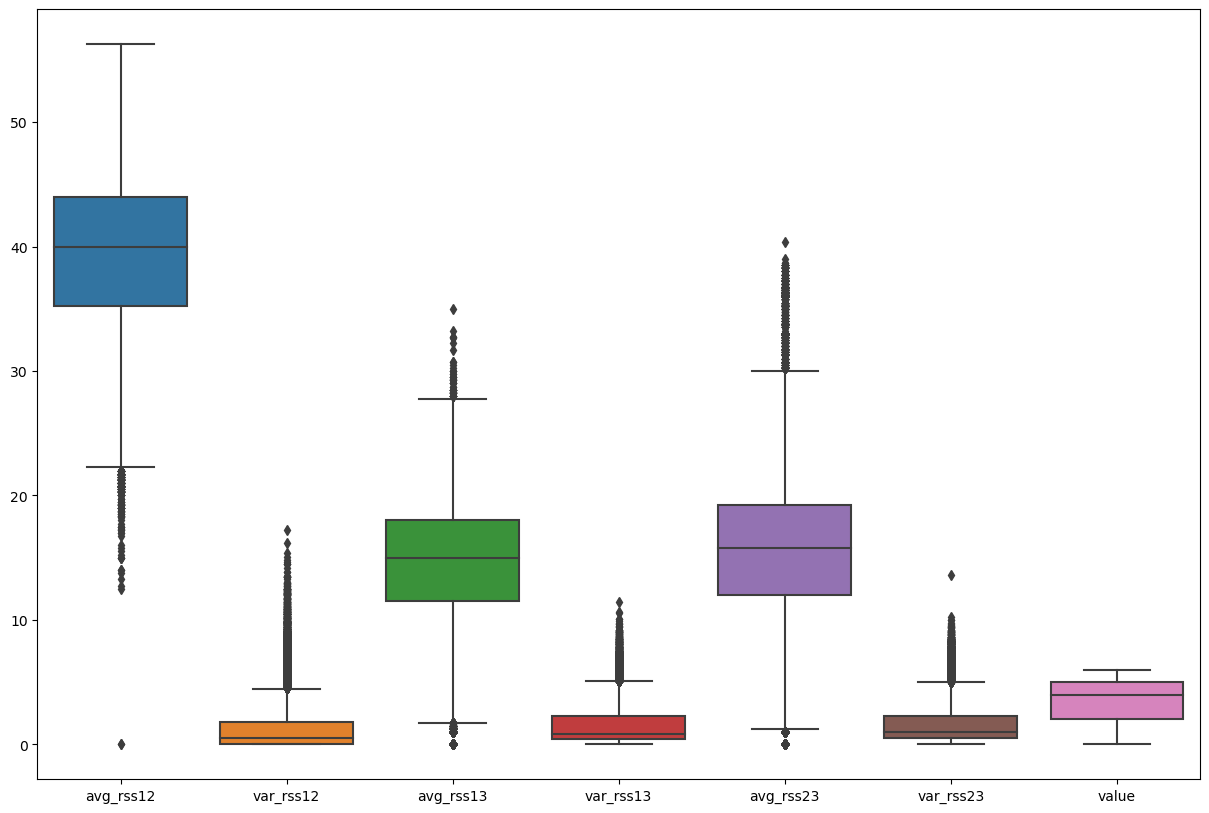

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df1, ax=ax)
plt.show()

In [14]:
q = df1['var_rss12'].quantile(0.60)
df1 = df1[df1['var_rss12']<q]

q = df1['var_rss12'].quantile(0.80)
df1 = df1[df1['var_rss12']<q]

q = df1['var_rss23'].quantile(0.70)
df1 = df1[df1['var_rss23']<q]

q = df1['avg_rss12'].quantile(0.90)
df1 = df1[df1['avg_rss12']<q]

q = df1['var_rss13'].quantile(0.90)
df1 = df1[df1['var_rss13']<q]

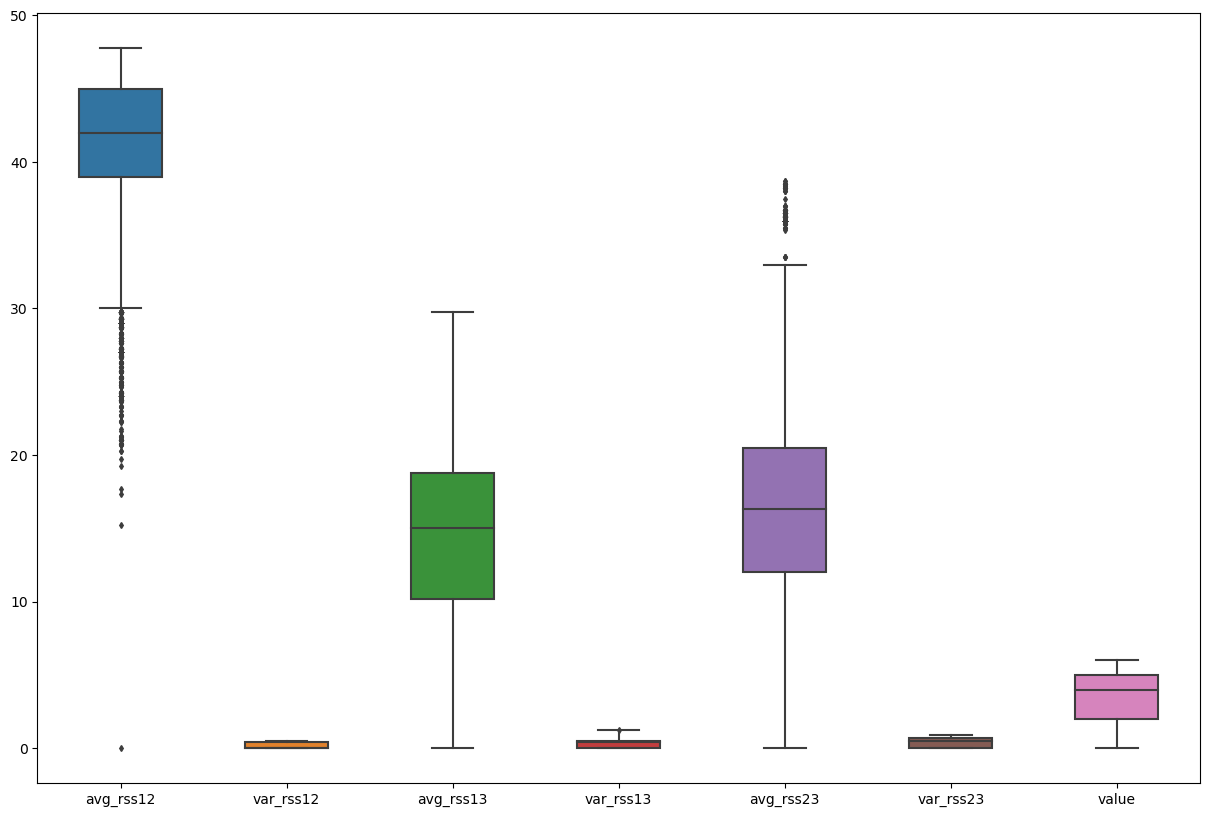

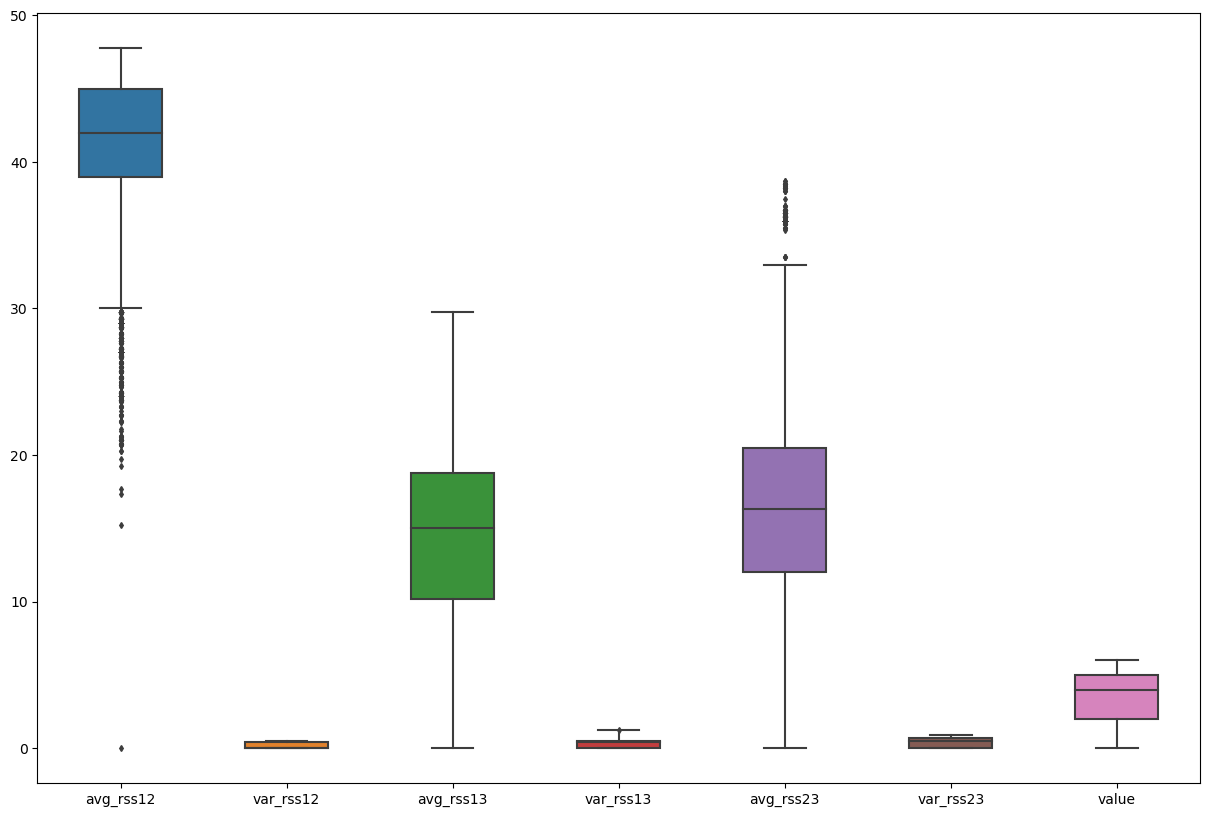

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df1, width= 0.5,ax=ax,  fliersize=3)
plt.show()

In [17]:
# Now we have removed some ouliers but it is not possible to remove all the outliers.

In [25]:
x = df1.drop(columns= ['value','# Columns: time' ],axis=1)
y = df1.value

In [26]:
x

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
1,39.25,0.43,23.00,0.00,33.00,0.00
2,39.25,0.43,23.25,0.43,33.00,0.00
5,39.25,0.43,24.00,0.00,33.00,0.00
6,39.25,0.43,24.00,0.00,33.00,0.00
7,39.00,0.00,23.75,0.43,33.00,0.00
...,...,...,...,...,...,...
34063,44.67,0.47,18.00,0.00,3.67,0.47
34068,44.33,0.47,18.33,0.47,5.75,0.43
34071,44.25,0.43,18.00,0.00,1.00,0.00
34078,44.67,0.47,18.00,0.00,9.00,0.00


In [27]:
# Now we need to standard scaling our data becuase there is so many differences
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[-0.08879366,  1.05140731,  1.41794598, -1.1376444 ,  2.20159148,
        -1.4661218 ],
       [-0.08879366,  1.05140731,  1.45819822,  0.06601002,  2.20159148,
        -1.4661218 ],
       [-0.08879366,  1.05140731,  1.57895495, -1.1376444 ,  2.20159148,
        -1.4661218 ],
       ...,
       [ 0.6830538 ,  1.05140731,  0.61290114, -1.1376444 , -2.14812766,
        -1.4661218 ],
       [ 0.74788899,  1.23082514,  0.61290114, -1.1376444 , -1.06069788,
        -1.4661218 ],
       [-1.97981993, -0.8773343 , -0.83617957, -1.1376444 ,  0.16266063,
        -1.4661218 ]])

In [28]:
# Checking for variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(scaled_x, i) for i in range(scaled_x.shape[1])]
vif['features'] = x.columns
vif

,vif,features
0,1.059974,avg_rss12
1,1.022980,var_rss12
2,1.394822,avg_rss13
3,1.018934,var_rss13
4,1.354248,avg_rss23
5,1.019156,var_rss23


In [30]:
# We can see there is no any feature which vif value is greater than 10 so there is no any outliers
# Now split the data into train, test, split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.2, random_state = 355)

In [32]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter = 10000)
log.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [33]:
y_pred = log.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


In [35]:
confusion_matrix(y_test, y_pred)

array([[127,  11,  30,   0,  20,   0],
       [  1, 150,   0,   2,  43,   0],
       [  7,   0, 323,  14,  11,   0],
       [  1,   2,  21, 366, 103,   0],
       [ 47,  12,  24, 141, 255,   0],
       [  1,   0,   0,   0,   0,   0]], dtype=int64)

In [38]:
y_test

29432    4
13207    2
21294    5
18935    2
28820    4
        ..
31366    4
23638    5
27840    4
974      1
5715     0
Name: value, Length: 1712, dtype: int64

In [39]:
from sklearn.metrics import classification_report
report  = classification_report(y_test, y_pred)

C:\Users\Sanjeev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanjeev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sanjeev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
print(report)

              precision    recall  f1-score   support

           0       0.69      0.68      0.68       188
           1       0.86      0.77      0.81       196
           2       0.81      0.91      0.86       355
           4       0.70      0.74      0.72       493
           5       0.59      0.53      0.56       479
           6       0.00      0.00      0.00         1

    accuracy                           0.71      1712
   macro avg       0.61      0.60      0.60      1712
weighted avg       0.71      0.71      0.71      1712



In [42]:
log.score(x_test, y_test)

0.7132009345794392

In [43]:
# The score of the model is 71 percent.
# Let's see if it increases after applying some other parameter tunning

In [44]:
log_liblinear = LogisticRegression(verbose = 1, solver = 'liblinear')
log_liblinear.fit(x_train, y_train)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [45]:
log_liblinear.score(x_test, y_test)

0.6869158878504673

In [46]:
# after using liblinear the accuracy of the model decreases.

In [ ]:
# So we will use our first model.
import pickle
pickle.dump(log, 'log_lr.sav')